In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [9]:
with open('gradcam_cpu_512.json') as json_file:
    cpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

with open('gradcam_hpu_512.json') as json_file:
    hpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

Type: <class 'dict'>
Type: <class 'dict'>


In [8]:
cpu_results

{'1': [0.25194859504699707, 0.2756693363189697, 0.2699873447418213],
 '2': [0.44094395637512207, 0.4744296073913574, 0.43804335594177246],
 '4': [0.6955013275146484, 0.8894748687744141, 0.9116332530975342],
 '8': [1.2481279373168945, 1.7603309154510498, 1.7760288715362549],
 '16': [2.57440447807312, 3.5136914253234863, 3.5156476497650146],
 '32': [5.267951965332031, 6.900628089904785, 7.016942739486694],
 '64': [10.041488409042358, 14.009527921676636, 13.477323293685913],
 '128': [20.507671356201172, 27.598479747772217, 29.847187757492065],
 '256': [40.157540798187256, 54.60897731781006, 53.882832288742065],
 '512': [81.65223813056946, 116.01560854911804, 108.23516798019409]}

In [10]:
hpu_results

{'1': [4.205038547515869, 4.502248048782349, 4.7163941860198975],
 '2': [3.036112070083618, 3.3213446140289307, 3.3111672401428223],
 '4': [0.7039511203765869, 0.645390510559082, 0.6123826503753662],
 '8': [1.0109601020812988, 1.2275011539459229, 1.182258129119873],
 '16': [1.7542061805725098, 2.1292295455932617, 2.108365774154663],
 '32': [3.2974042892456055, 4.21675968170166, 4.225637674331665],
 '64': [6.619365215301514, 8.550841093063354, 8.408239364624023],
 '128': [13.254505634307861, 16.74453830718994, 17.004977464675903],
 '256': [26.644065618515015, 34.17719841003418, 34.36649227142334],
 '512': [52.83615970611572, 68.060387134552, 68.06403541564941]}

In [25]:
x = np.array(list(cpu_results.keys())).astype(int)

In [34]:
cpu_y = {
    'dog+cat': [i[0] for i in cpu_results.values()],
    'dogs': [i[1] for i in cpu_results.values()],
    'horses': [i[2] for i in cpu_results.values()],
    'totals': [sum(i) for i in cpu_results.values()]
}
hpu_y = {
    'dog+cat': [i[0] for i in hpu_results.values()],
    'dogs': [i[1] for i in hpu_results.values()],
    'horses': [i[2] for i in hpu_results.values()],
    'totals': [sum(i) for i in hpu_results.values()]
}

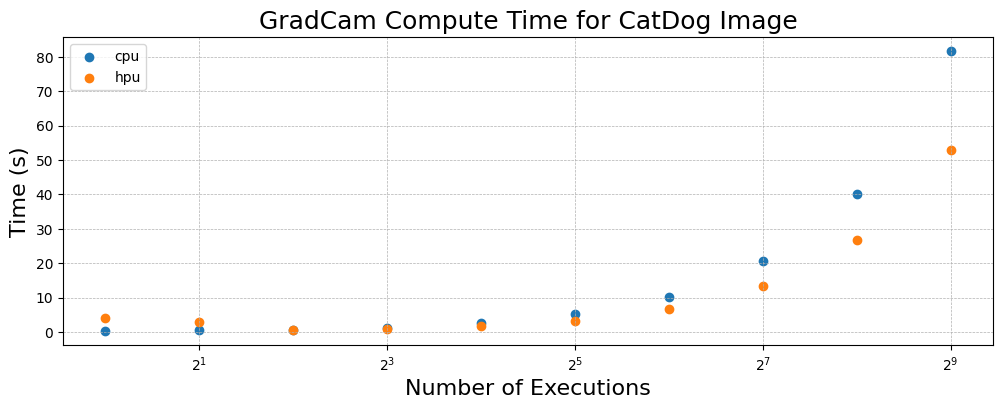

In [72]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['dog+cat'], label='cpu')
plt.scatter(x, hpu_y['dog+cat'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for CatDog Image', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

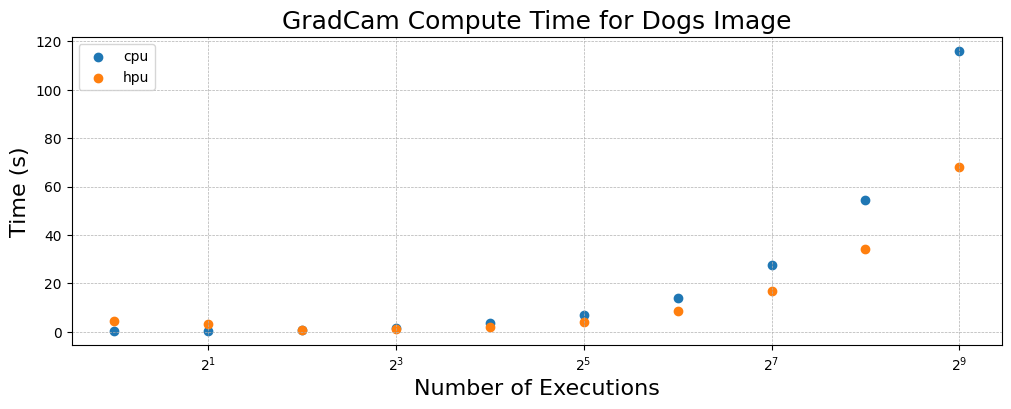

In [73]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['dogs'], label='cpu')
plt.scatter(x, hpu_y['dogs'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for Dogs Image', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

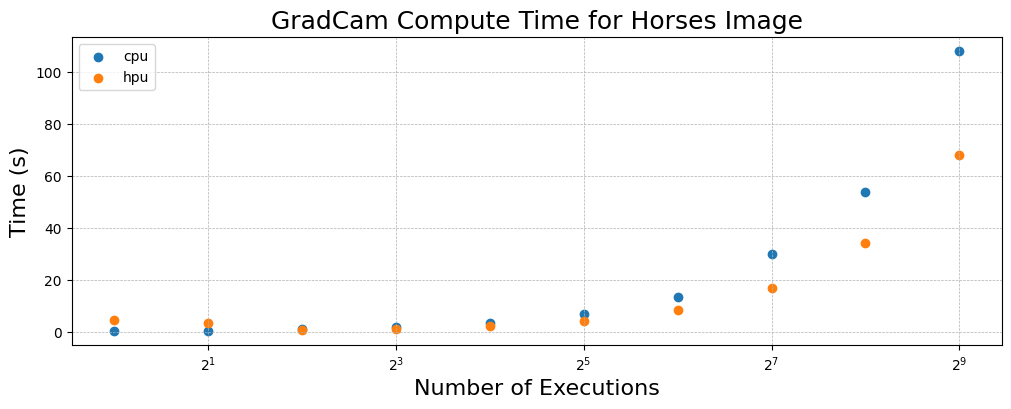

In [74]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['horses'], label='cpu')
plt.scatter(x, hpu_y['horses'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for Horses Image', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

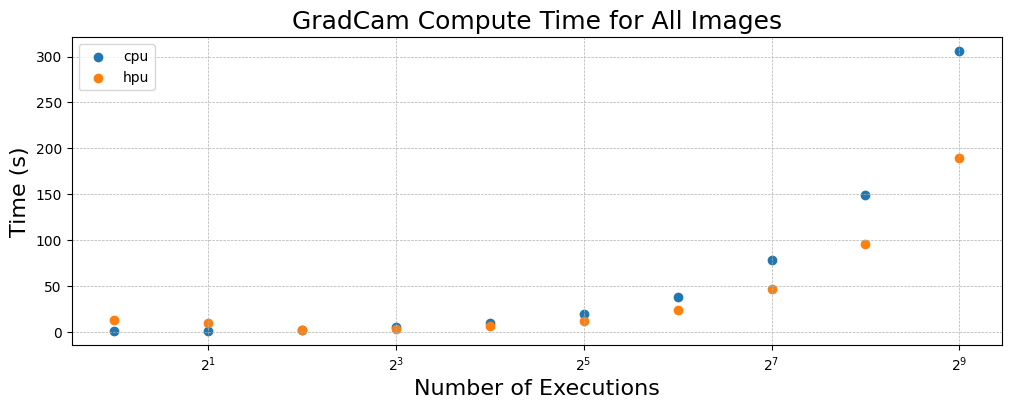

In [76]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['totals'], label='cpu')
plt.scatter(x, hpu_y['totals'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for All Images', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

In [115]:
def percent_difference(value1, value2):
    try:
        # Calculate the percent difference
        percent_diff = (value1 - value2) / ((value1 + value2) / 2) * 100
        return percent_diff
    except ZeroDivisionError:
        # Handle the case where the denominator is zero
        return "Error: Division by zero"

# modified version of this that you can apply on a data frame
def pct_diff(x):
  change = abs((df[x] - df[x].shift(1))/((df[x] +df[x].shift(1))/2))
  return change

In [118]:
percent_difference(perc_diff['CPU'][8], perc_diff['HPU'][8])

np.float64(33.24153360093073)

In [138]:
import pandas as pd
perc_diff = pd.DataFrame({
    'N of Executions': np.array(x).astype(int),
    'CPU': cpu_y['totals'],
    'HPU': hpu_y['totals'],
    'HPU:CPU': [hpu_y['totals'][i]/cpu_y['totals'][i] for i in range(10)]
}).set_index('N of Executions')

In [139]:
perc_diff

,CPU,HPU,HPU:CPU
N of Executions,,,
1,0.797605,13.423681,16.829980
2,1.353417,9.668624,7.143862
4,2.496609,1.961724,0.785755
8,4.784488,3.420719,0.714960
16,9.603744,5.991802,0.623903
32,19.185523,11.739802,0.611909
64,37.528340,23.578446,0.628284
128,77.953339,47.004021,0.602976
256,148.649350,95.187756,0.640351


In [125]:
(77.953339 - 47.004021) / ((77.953339 + 47.004021) / 2) * 100

49.535806454297685

In [126]:
77.953339/47.004021*100

165.84397960336202

In [127]:
47.004021/77.953339*100

60.29763651304276